#### 📚 Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

#### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#### 🎲 Importando os dados

1. Utilizamos o encoding ISO-8859-1 para processar todos os caracteres do arquivo
2. Separamos uma amostra aleatória de 30% dos dados disponíveis

In [ ]:
df = pd.read_csv(
    '/content/drive/MyDrive/Dados/MICRODADOS_ENEM_2021.csv',
    header=0,
    encoding = "ISO-8859-1",
    skiprows=lambda i: i > 0 and random.random() > 0.3,
    sep=';'
)

#### 👀 Dando uma olhada na estrutura geral dos dados

In [ ]:
df.head(3)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210053865474,2021,5,F,1,1,1,1,3,1,...,A,A,A,B,A,A,B,A,B,B
1,210052384164,2021,12,M,1,1,1,1,11,1,...,A,A,A,B,A,A,C,A,A,A
2,210052589243,2021,13,F,3,1,1,1,15,1,...,B,A,A,B,A,A,C,B,B,B


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016558 entries, 0 to 1016557
Data columns (total 76 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   NU_INSCRICAO            1016558 non-null  int64  
 1   NU_ANO                  1016558 non-null  int64  
 2   TP_FAIXA_ETARIA         1016558 non-null  int64  
 3   TP_SEXO                 1016558 non-null  object 
 4   TP_ESTADO_CIVIL         1016558 non-null  int64  
 5   TP_COR_RACA             1016558 non-null  int64  
 6   TP_NACIONALIDADE        1016558 non-null  int64  
 7   TP_ST_CONCLUSAO         1016558 non-null  int64  
 8   TP_ANO_CONCLUIU         1016558 non-null  int64  
 9   TP_ESCOLA               1016558 non-null  int64  
 10  TP_ENSINO               329652 non-null   float64
 11  IN_TREINEIRO            1016558 non-null  int64  
 12  CO_MUNICIPIO_ESC        244326 non-null   float64
 13  NO_MUNICIPIO_ESC        244326 non-null   object 
 14  CO

In [ ]:
np.mean(df['NU_NOTA_MT'])

534.8740733203305

#### 📊 Criando um DataFrame apenas com os atributos que vão ser interessantes para o nosso modelo


1. TP_ESCOLA = Tipo de escola [Não respondeu (1), Pública (2), Privada (3)]
2. TP_FAIXA_ETARIA = Grupos de faixas etárias
3. TP_COR_RACA = Grupos raciais de acordo com o IBGE
4. Q001 = Escolaridade do pai
5. Q002 = Escolaridade da Mãe
6. Q005 = Quantas pessoas moram na mesma casa que o candidato
7. Q006 = Renda mensal da família
8. Q024 = Quantidade de computadores na casa
9. Q025 = Acesso a internet [Não (A), Sim (B)]
10. NU_NOTA_MT = Nota da prova de matemática

In [ ]:
filtro_atributos = ['TP_ESCOLA', 'TP_FAIXA_ETARIA', 'TP_COR_RACA', 'Q001', 'Q002', 'Q005','Q006','Q024','Q025','NU_NOTA_MT']
model_df = df[filtro_atributos]
model_df = model_df.copy()
model_df.head()

,TP_ESCOLA,TP_FAIXA_ETARIA,TP_COR_RACA,Q001,Q002,Q005,Q006,Q024,Q025,NU_NOTA_MT
0,1,5,1,F,F,3.0,D,B,B,NaN
1,1,12,1,B,B,3.0,B,A,A,461.5
2,1,13,1,B,C,3.0,C,B,B,NaN
3,1,11,3,E,E,3.0,C,B,B,509.7
4,1,5,2,B,E,4.0,D,A,B,NaN


#### 🧹🪣 Retirando as linhas com os valores nulos 

In [ ]:
model_df.isnull().sum()

TP_ESCOLA               0
TP_FAIXA_ETARIA         0
TP_COR_RACA             0
Q001                    2
Q002                    2
Q005                    2
Q006                    2
Q024                    2
Q025                    2
NU_NOTA_MT         343375
dtype: int64

In [ ]:
model_df.dropna(inplace=True)

In [ ]:
model_df.head()

,TP_ESCOLA,TP_FAIXA_ETARIA,TP_COR_RACA,Q001,Q002,Q005,Q006,Q024,Q025,NU_NOTA_MT
1,1,12,1,B,B,3.0,B,A,A,461.5
3,1,11,3,E,E,3.0,C,B,B,509.7
5,1,7,1,E,E,2.0,B,A,B,553.1
6,2,2,3,B,B,4.0,B,A,A,537.2
7,1,13,3,C,C,2.0,C,A,B,439.1


In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 673182 entries, 1 to 1016549
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TP_ESCOLA        673182 non-null  int64  
 1   TP_FAIXA_ETARIA  673182 non-null  int64  
 2   TP_COR_RACA      673182 non-null  int64  
 3   Q001             673182 non-null  object 
 4   Q002             673182 non-null  object 
 5   Q005             673182 non-null  float64
 6   Q006             673182 non-null  object 
 7   Q024             673182 non-null  object 
 8   Q025             673182 non-null  object 
 9   NU_NOTA_MT       673182 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 56.5+ MB


In [ ]:
model_df['TP_ESCOLA'].value_counts()

1    417706
2    201835
3     53641
Name: TP_ESCOLA, dtype: int64

In [ ]:
remove = model_df.loc[model_df['TP_ESCOLA'] == 1]
model_df = model_df.drop(remove.index)
model_df.head()

,TP_ESCOLA,TP_FAIXA_ETARIA,TP_COR_RACA,Q001,Q002,Q005,Q006,Q024,Q025,NU_NOTA_MT
6,2,2,3,B,B,4.0,B,A,A,537.2
10,2,3,3,C,C,4.0,F,A,B,427.0
11,2,3,1,C,C,6.0,B,B,B,423.0
18,2,1,1,E,F,5.0,H,A,B,586.8
20,2,4,3,H,E,4.0,C,A,B,570.2


#### ➕ Calculando o percentil 85, já que os candidatos que estiverem no top 15% tiraram uma nota maior do que esse valor 

In [ ]:
percentil = np.percentile(model_df['NU_NOTA_MT'], 85)
percentil

653.0

#### 🎯 Criando uma coluna para o nosso valor target

In [ ]:
model_df['target'] = model_df['NU_NOTA_MT'].apply(lambda x: x > percentil) 
model_df.head()

,TP_ESCOLA,TP_FAIXA_ETARIA,TP_COR_RACA,Q001,Q002,Q005,Q006,Q024,Q025,NU_NOTA_MT,target
6,2,2,3,B,B,4.0,B,A,A,537.2,False
10,2,3,3,C,C,4.0,F,A,B,427.0,False
11,2,3,1,C,C,6.0,B,B,B,423.0,False
18,2,1,1,E,F,5.0,H,A,B,586.8,False
20,2,4,3,H,E,4.0,C,A,B,570.2,False


In [ ]:
model_df.head()

,TP_ESCOLA,TP_FAIXA_ETARIA,TP_COR_RACA,Q001,Q002,Q005,Q006,Q024,Q025,NU_NOTA_MT,target
6,2,2,3,B,B,4.0,B,A,A,537.2,False
10,2,3,3,C,C,4.0,F,A,B,427.0,False
11,2,3,1,C,C,6.0,B,B,B,423.0,False
18,2,1,1,E,F,5.0,H,A,B,586.8,False
20,2,4,3,H,E,4.0,C,A,B,570.2,False


#### ✏️ Renomeando o nome das colunas: 

In [ ]:
model_df.rename(columns={'TP_ESCOLA': 'tipo escola', 'TP_FAIXA_ETARIA': 'faixa etaria', 'TP_COR_RACA': 'cor ou raça'}, inplace = True)

In [ ]:
model_df.rename(columns={'Q001': 'escolaridade pai', 'Q002': 'escolaridade mãe', 'Q005': 'qtd moradores', 'Q006': 'renda mensal', 'Q024': 'qtd computadores', 'Q025': 'acesso internet'}, inplace = True)

In [ ]:
model_df.rename(columns={'NU_NOTA_MT': 'nota matematica', 'target': 'top 15%?'}, inplace = True)

In [ ]:
model_df.head()

,tipo escola,faixa etaria,cor ou raça,escolaridade pai,escolaridade mãe,qtd moradores,renda mensal,qtd computadores,acesso internet,nota matematica,top 15%?
6,2,2,3,B,B,4.0,B,A,A,537.2,False
10,2,3,3,C,C,4.0,F,A,B,427.0,False
11,2,3,1,C,C,6.0,B,B,B,423.0,False
18,2,1,1,E,F,5.0,H,A,B,586.8,False
20,2,4,3,H,E,4.0,C,A,B,570.2,False


#### 👉🔢 Agrupando os valores de colunas com muitas classes + Transformando as classes em valores numéricos 

##### **Agrupamento de renda mensal da família**

In [ ]:
model_df['renda mensal'].value_counts()

B    63518
C    37805
D    30652
F    19427
G    17071
E    16845
H    13816
A    13536
I     8666
M     5453
J     5280
Q     4746
K     4220
O     3775
P     3720
L     3644
N     3302
Name: renda mensal, dtype: int64

Q006: "Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)"

O valores possíveis são grupos de A-Q com ranges de renda progressivos. Por exemplo, o grupo B respondeu que a renda mensal da sua família era de R$ 998,01 até 1.497,00.

Para simplificar a análise, agruparei esses grupos em 5. De modo que:

Grupo 0: Respondeu que a família não possui nenhuma renda

Grupo 1: Respondeu que a família possui renda entre R$ 998,01 e R\$ 2.495,00

Grupo 2: Respondeu que a família possui renda entre R$ 2.495,00 e R\$ 5.988,00

Grupo 3: Respondeu que a família possui renda entre R$ 5.988,00 e R\$ 9.980,00

Grupo 4: Respondeu que a família possui renda entre R$ 9.980,00 e R\$ 19.960,00 ou mais

In [ ]:
def subgrupos(x):
    if x =='A':
        return 0
    if x in 'BCDE':
        return 1
    if x in 'FGHI': 
        return 2
    if x in 'JKLM': 
        return 3
    if x in 'NOPQ': 
        return 4

In [ ]:
model_df['renda mensal'] = model_df['renda mensal'].apply(subgrupos)

In [ ]:
model_df['renda mensal'].value_counts()

1    148820
2     58980
3     18597
4     15543
0     13536
Name: renda mensal, dtype: int64

##### **Agrupamento de faixas etárias**

In [ ]:
model_df['faixa etaria'].value_counts()

2     114318
3     108322
4      19336
5       5403
1       3091
6       1694
7        688
11       619
12       390
8        365
9        275
13       273
14       209
10       182
15       140
16       100
17        49
18        14
20         4
19         4
Name: faixa etaria, dtype: int64

In [ ]:
def subgrupos_etarios(x):
    if x == 1:
        return 0
    if x in [2, 3, 4, 5, 6, 7, 8, 9]:
        return 1
    if x in [10, 11, 12, 13, 14, 15]: 
        return 2
    if x in [16, 17, 18, 19, 20]: 
        return 3

In [ ]:
model_df['faixa etaria'] = model_df['faixa etaria'].apply(subgrupos_etarios)

#### 🧹🪣 Retirando linhas nas quais o canditato preferiu não responder sua cor ou raça ou não dispunha da informação

In [ ]:
remove_2 = model_df.loc[(model_df['cor ou raça'] == 0) | (model_df['cor ou raça'] == 6)]
model_df = model_df.drop(remove_2.index)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250092 entries, 6 to 1016169
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo escola       250092 non-null  int64  
 1   faixa etaria      250092 non-null  int64  
 2   cor ou raça       250092 non-null  int64  
 3   escolaridade pai  250092 non-null  object 
 4   escolaridade mãe  250092 non-null  object 
 5   qtd moradores     250092 non-null  float64
 6   renda mensal      250092 non-null  int64  
 7   qtd computadores  250092 non-null  object 
 8   acesso internet   250092 non-null  object 
 9   nota matematica   250092 non-null  float64
 10  top 15%?          250092 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 21.2+ MB


#### 🧹🪣 Retirando linhas nas quais o canditato não dispunha da informação sobre a escolaridade dos seus pais

In [ ]:
remove_3 = model_df.loc[(model_df['escolaridade pai'] == 'H')]
model_df = model_df.drop(remove_3.index)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229381 entries, 6 to 1016169
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo escola       229381 non-null  int64  
 1   faixa etaria      229381 non-null  int64  
 2   cor ou raça       229381 non-null  int64  
 3   escolaridade pai  229381 non-null  object 
 4   escolaridade mãe  229381 non-null  object 
 5   qtd moradores     229381 non-null  float64
 6   renda mensal      229381 non-null  int64  
 7   qtd computadores  229381 non-null  object 
 8   acesso internet   229381 non-null  object 
 9   nota matematica   229381 non-null  float64
 10  top 15%?          229381 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 19.5+ MB


In [ ]:
remove_4 = model_df.loc[(model_df['escolaridade mãe'] == 'H')]
model_df = model_df.drop(remove_4.index)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227263 entries, 6 to 1016169
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo escola       227263 non-null  int64  
 1   faixa etaria      227263 non-null  int64  
 2   cor ou raça       227263 non-null  int64  
 3   escolaridade pai  227263 non-null  object 
 4   escolaridade mãe  227263 non-null  object 
 5   qtd moradores     227263 non-null  float64
 6   renda mensal      227263 non-null  int64  
 7   qtd computadores  227263 non-null  object 
 8   acesso internet   227263 non-null  object 
 9   nota matematica   227263 non-null  float64
 10  top 15%?          227263 non-null  bool   
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 19.3+ MB


**Agrupamento de classes referentes a escolaridade dos pais**

In [ ]:
def subgrupos_escolaridade(x):
    if x =='A':
        return 0
    if x in 'BC':
        return 1
    if x in 'DE': 
        return 2
    if x in 'FG': 
        return 3

In [ ]:
model_df['escolaridade pai'] = model_df['escolaridade pai'].apply(subgrupos_escolaridade)

In [ ]:
model_df['escolaridade mãe'] = model_df['escolaridade mãe'].apply(subgrupos_escolaridade)

**Agrupamento das classes referentes a quantidade de pessoas que moram na mesma casa que o candidato**

In [ ]:
def subgrupos_moradores(x):
    if x in [1, 2, 3, 4, 5]:
        return 1
    if x in [6, 7, 8, 9, 10]: 
        return 2
    if x in [11, 12, 13, 14, 15]: 
        return 3
    if x in [16, 17, 18, 19, 20]: 
        return 4

In [ ]:
model_df['qtd moradores'] = model_df['qtd moradores'].apply(subgrupos_moradores)

#### 👉🔢 Transformando as classes da coluna "acesso a internet" em valores numéricos

In [ ]:
model_df['acesso internet'] = model_df['acesso internet'].apply(lambda x: 1 if x == 'B' else 0) 

**Agrupamento das classes referentes a quantidade de computadores presentes na casa do candidato**

In [ ]:
def subgrupos_computadores(x):
    if x =='A':
        return 0
    if x in 'BC':
        return 1
    if x in 'DE': 
        return 2

In [ ]:
model_df['qtd computadores'] = model_df['qtd computadores'].apply(subgrupos_computadores)

In [ ]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227263 entries, 6 to 1016169
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tipo escola       227263 non-null  int64  
 1   faixa etaria      227263 non-null  int64  
 2   cor ou raça       227263 non-null  int64  
 3   escolaridade pai  227263 non-null  int64  
 4   escolaridade mãe  227263 non-null  int64  
 5   qtd moradores     227263 non-null  int64  
 6   renda mensal      227263 non-null  int64  
 7   qtd computadores  227263 non-null  int64  
 8   acesso internet   227263 non-null  int64  
 9   nota matematica   227263 non-null  float64
 10  top 15%?          227263 non-null  bool   
dtypes: bool(1), float64(1), int64(9)
memory usage: 19.3 MB


In [ ]:
np.mean(model_df['nota matematica'])

532.8781301839717

#### 🔮 Importando o classificador Gaussian Naive Bayes

Nesse algoritmo, a probabilidade das features é assumida como uma gaussiana:

$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

Os parametros $\sigma_y$ e $\mu_y$ são estimados usando a máxima verossimilhança.

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 15, 6

#### 🗂️ Definindo o vetor de variáveis independentes e a target:

In [ ]:
X = model_df[['tipo escola', 'faixa etaria', 'cor ou raça','escolaridade pai', 'escolaridade mãe', 'qtd moradores', 'renda mensal', 'qtd computadores', 'acesso internet']]
Y = model_df['top 15%?']

#### ✂️ Separando nosso dataset em um set de treino e um set de teste

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=0)

#### 🏋️ Treinando...

In [ ]:
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
Y_pred = clf.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

       False       0.92      0.78      0.85     38198
        True       0.36      0.66      0.47      7255

    accuracy                           0.76     45453
   macro avg       0.64      0.72      0.66     45453
weighted avg       0.83      0.76      0.79     45453



In [ ]:
cf_matrix_nb = confusion_matrix(Y_test, Y_pred)
print(cf_matrix_nb)

[[29825  8373]
 [ 2458  4797]]


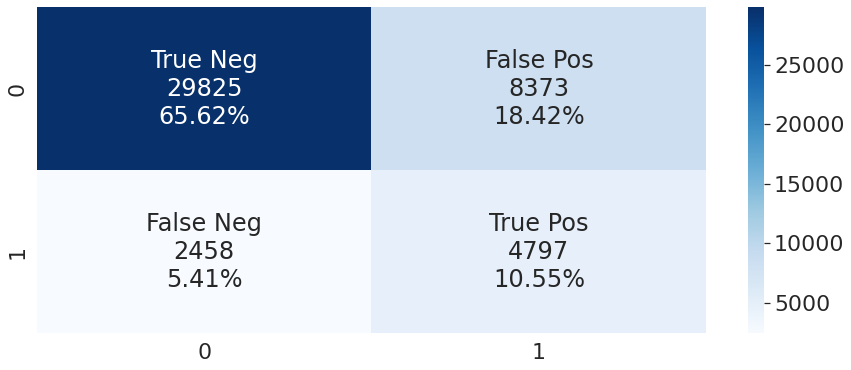

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_nb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_nb.flatten() / np.sum(cf_matrix_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 2 )
sns.heatmap(cf_matrix_nb, annot=labels, fmt= '', cmap='Blues')

#### 🔮 Importando o classificador K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### 🏋️ Treinando...

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
Y_pred_knn = neigh.predict(X_test)
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

       False       0.86      0.94      0.90     38198
        True       0.41      0.22      0.28      7255

    accuracy                           0.83     45453
   macro avg       0.64      0.58      0.59     45453
weighted avg       0.79      0.83      0.80     45453



In [ ]:
cf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
print(cf_matrix_nb)

[[29825  8373]
 [ 2458  4797]]


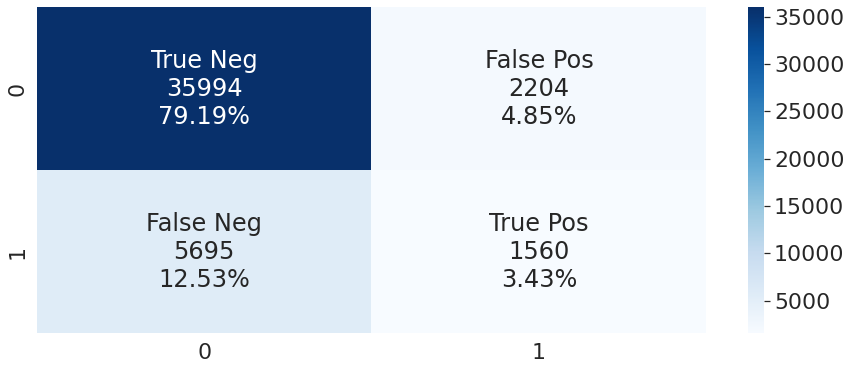

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix_knn.flatten() / np.sum(cf_matrix_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale= 2 )
sns.heatmap(cf_matrix_knn, annot=labels, fmt= '', cmap='Blues')

#### 🔮 Importando o classificador Decision Tree

In [ ]:
from sklearn import tree

#### 🏋️ Treinando...

In [ ]:
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train,Y_train)

DecisionTreeClassifier()

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
Y_pred_dtree = dtree.predict(X_test)
print(classification_report(Y_test,Y_pred_dtree))

              precision    recall  f1-score   support

       False       0.87      0.97      0.92     38198
        True       0.58      0.20      0.30      7255

    accuracy                           0.85     45453
   macro avg       0.72      0.59      0.61     45453
weighted avg       0.82      0.85      0.82     45453



#### 🔮 Importando o classificador Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

#### 🏋️ Treinando...

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,Y_train)

LogisticRegression()

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
Y_pred_reg = logisticRegr.predict(X_test)
print(classification_report(Y_test,Y_pred_reg))

              precision    recall  f1-score   support

       False       0.87      0.97      0.92     38198
        True       0.58      0.23      0.33      7255

    accuracy                           0.85     45453
   macro avg       0.72      0.60      0.63     45453
weighted avg       0.82      0.85      0.82     45453



#### 🔮 Importando o classificador Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#### 🏋️ Treinando...

In [ ]:
randomf = RandomForestClassifier(random_state=0)
randomf.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

#### 🤔 Analisando o Classification Report do modelo

In [ ]:
Y_pred_rf = randomf.predict(X_test)
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

       False       0.87      0.97      0.92     38198
        True       0.58      0.20      0.30      7255

    accuracy                           0.85     45453
   macro avg       0.72      0.59      0.61     45453
weighted avg       0.82      0.85      0.82     45453



#### 🔎 Shap Values: identificando quais features foram mais importantes para os nossos modelos

SHAP Values (SHapley Additive exPlanations) é um método baseado na teoria dos jogos usado para aumentar a transparência e a interpretabilidade de modelos de aprendizado de máquina.

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
explainer_clf = shap.Explainer(clf.predict, X_test)
shap_values_clf = explainer_clf(X_test)

Exact explainer: 45454it [12:02, 62.57it/s]                           


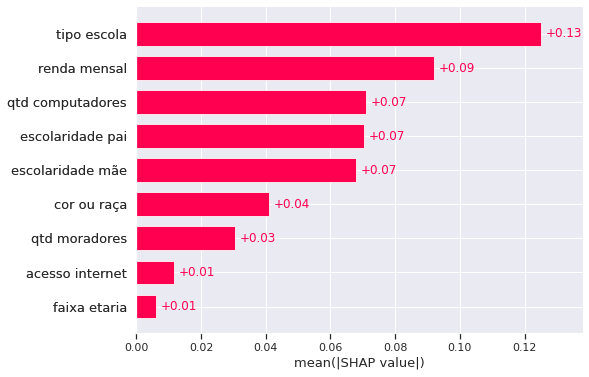

In [ ]:
shap.plots.bar(shap_values_clf)

#### 🤔 Comparando acurácias de cada modelo

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac_nb = accuracy_score(Y_test, Y_pred)
ac_knn = accuracy_score(Y_test,Y_pred_knn)
ac_dtree = accuracy_score(Y_test,Y_pred_dtree)
ac_reg = accuracy_score(Y_test,Y_pred_reg)
ac_rf = accuracy_score(Y_test,Y_pred_rf)

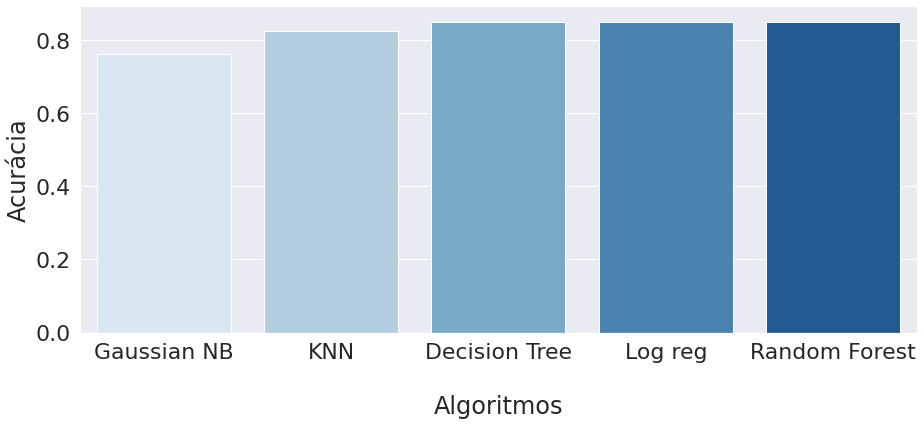

In [ ]:
dic = {'Gaussian NB': ac_nb, 'KNN': ac_knn, 'Decision Tree': ac_dtree, 'Log reg': ac_reg, 'Random Forest': ac_rf}

df_ac = pd.DataFrame(data = dic, index=[0, 1, 2, 3])

ax = sns.barplot(data = df_ac, palette = 'Blues')
ax.set(xlabel='\nAlgoritmos', ylabel='Acurácia')
plt.show()

#### 🤔 Comparando precisão de cada modelo

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
pr_nb = precision_score(Y_test, Y_pred)
pr_knn = precision_score(Y_test,Y_pred_knn)
pr_dtree = precision_score(Y_test,Y_pred_dtree)
pr_reg = precision_score(Y_test,Y_pred_reg)
pr_rf = precision_score(Y_test,Y_pred_rf)

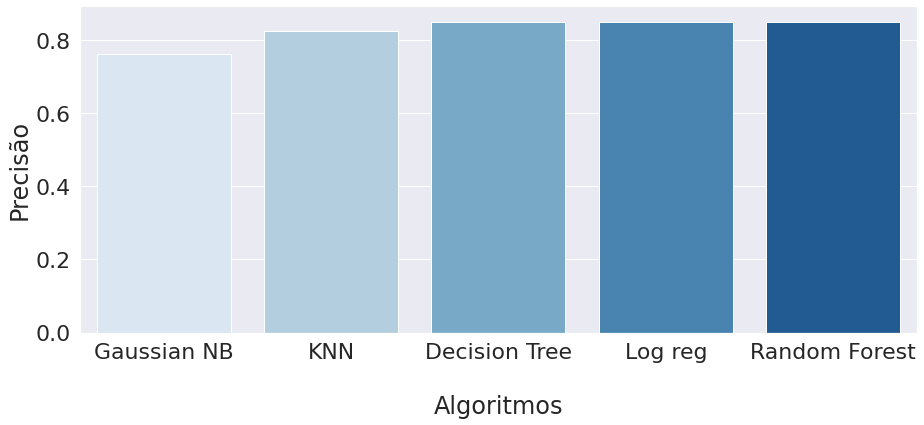

In [ ]:
dic1 = {'Gaussian NB': pr_nb, 'KNN': pr_knn, 'Decision Tree': pr_dtree, 'Log reg': pr_reg, 'Random Forest': pr_rf}

df_pr = pd.DataFrame(data = dic1, index=[0, 1, 2, 3])

ax = sns.barplot(data = df_ac, palette = 'Blues')
ax.set(xlabel='\nAlgoritmos', ylabel='Precisão')
plt.show()

#### 🤔 Comparando AUC (Area Under the Curve) de cada modelo

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc_nb = roc_auc_score(Y_test, Y_pred)
auc_knn = roc_auc_score(Y_test,Y_pred_knn)
auc_dtree = roc_auc_score(Y_test,Y_pred_dtree)
auc_reg = roc_auc_score(Y_test,Y_pred_reg)
auc_rf = roc_auc_score(Y_test,Y_pred_rf)

auc_nb, auc_knn, auc_dtree, auc_reg

(0.7209996074355793,
 0.5786623826542169,
 0.5875748868323631,
 0.6012443036391072)

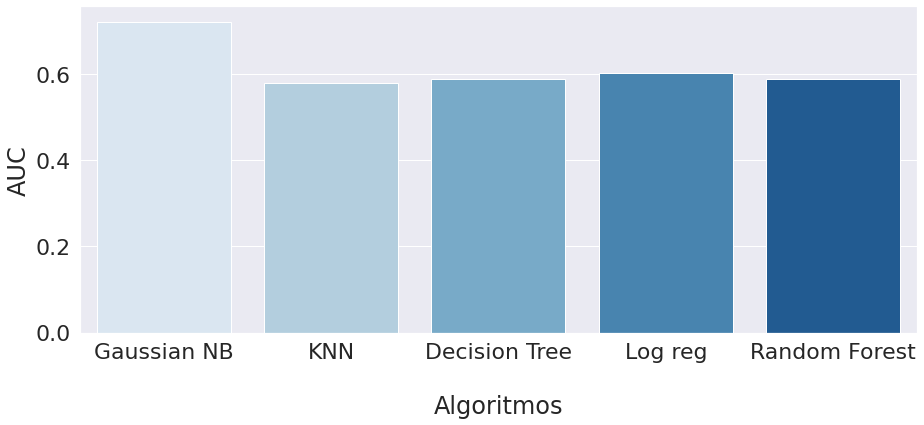

In [ ]:
dic2 = {'Gaussian NB': auc_nb, 'KNN': auc_knn, 'Decision Tree': auc_dtree, 'Log reg': auc_reg, 'Random Forest': auc_rf}

df_auc = pd.DataFrame(data = dic2, index=[0, 1, 2, 3])

ax = sns.barplot(data = df_auc, palette = 'Blues')
ax.set(xlabel='\nAlgoritmos', ylabel='AUC')
plt.show()

#### 🤔 Comparando acurácia dos modelos com Cross Validation

**Naive Bayes**

In [ ]:
from sklearn.model_selection import cross_val_score

 
cv  = cross_val_score(clf, X_train, Y_train)
print(f'Acuracia modelo de treino, utilizando validação cruzada: {cv.mean()}')


cv = cross_val_score(clf, X_test, Y_test)
print(f'Acuracia modelo de teste, utilizando validação cruzada: {cv.mean()}')
cv_nb = cv.mean()
clf.fit(X_test, Y_test)

Acuracia modelo de treino, utilizando validação cruzada: 0.7637588691491117
Acuracia modelo de teste, utilizando validação cruzada: 0.7627219923620345


GaussianNB()

**Random Forest**

In [ ]:
cv  = cross_val_score(randomf, X_train, Y_train)
print(f'Acuracia modelo de treino, utilizando validação cruzada: {cv.mean()}')


cv = cross_val_score(randomf, X_test, Y_test)
print(f'Acuracia modelo de teste, utilizando validação cruzada: {cv.mean()}')

cv_rf = cv.mean()
randomf.fit(X_test, Y_test)

Acuracia modelo de treino, utilizando validação cruzada: 0.8500302513613113
Acuracia modelo de teste, utilizando validação cruzada: 0.8474028412631165


RandomForestClassifier(random_state=0)

Logistic Regression

In [ ]:
cv  = cross_val_score(logisticRegr, X_train, Y_train)
print(f'Acuracia modelo de treino, utilizando validação cruzada: {cv.mean()}')

cv = cross_val_score(logisticRegr, X_test, Y_test)
print(f'Acuracia modelo de teste, utilizando validação cruzada: {cv.mean()}')

cv_reg = cv.mean()
logisticRegr.fit(X_test, Y_test)

Acuracia modelo de treino, utilizando validação cruzada: 0.8505637753698917
Acuracia modelo de teste, utilizando validação cruzada: 0.8505489404951934


LogisticRegression()

KNN

In [ ]:
cv  = cross_val_score(neigh, X_train, Y_train)
print(f'Acuracia modelo de treino, utilizando validação cruzada: {cv.mean()}')

cv = cross_val_score(neigh, X_test, Y_test)
print(f'Acuracia modelo de teste, utilizando validação cruzada: {cv.mean()}')

cv_knn = cv.mean()
neigh.fit(X_test, Y_test)

Acuracia modelo de treino, utilizando validação cruzada: 0.8301633573510807
Acuracia modelo de teste, utilizando validação cruzada: 0.8055358247297615


KNeighborsClassifier(n_neighbors=3)

In [ ]:
rcParams['figure.figsize'] = 13, 6

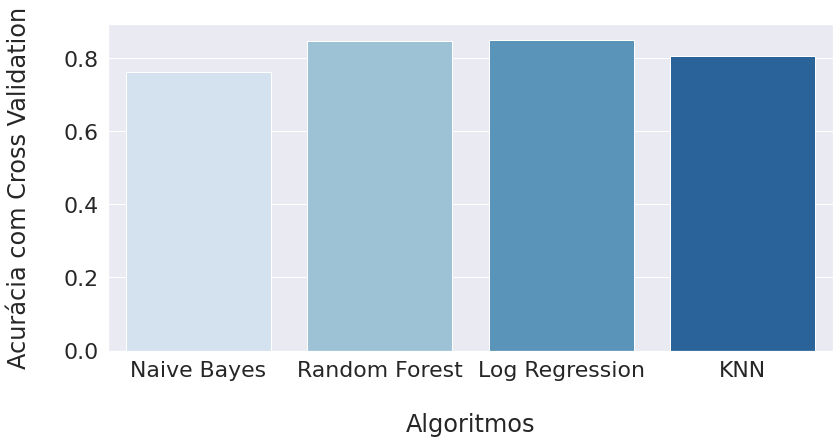

In [ ]:
dic3 = {'Naive Bayes': cv_nb, 'Random Forest': cv_rf, 'Log Regression': cv_reg, 'KNN': cv_knn}

df_cv = pd.DataFrame(data = dic3, index=[0, 1])

ax = sns.barplot(data = df_cv, palette = 'Blues')
ax.set(xlabel='\nAlgoritmos', ylabel='Acurácia com Cross Validation\n')
plt.show()